In [1]:
import numpy as np
import pandas as pd

# Loading the Dataset

In [86]:
df=pd.read_csv('Titanic-Dataset.csv')

In [87]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Basic Information

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking Null values

In [89]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handling Missing Values

## Mean Imputation

In [90]:
print(df[df.isnull().any(axis=1)])

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
7              8         0       3            Palsson, Master. Gosta Leonard   
..           ...       ...     ...                                       ...   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch        

In [91]:
df_mean_impute=df.fillna(df.mean(numeric_only=True))

In [92]:
df_mean_impute.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
for col in df_mean_impute.select_dtypes(include='object'):
    df_mean_impute[col].fillna(df_mean_impute[col].mode()[0], inplace=True)


C:\Users\arunendra\AppData\Local\Temp\ipykernel_16868\4141122641.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean_impute[col].fillna(df_mean_impute[col].mode()[0], inplace=True)


In [94]:
df_mean_impute.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [95]:
print(df_mean_impute[df_mean_impute.isnull().any(axis=1)])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [96]:
df_mean_impute

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Median Imputation

In [97]:
df_median_impute=df.fillna(df.median(numeric_only=True))

In [98]:
for col in df_median_impute.select_dtypes(include='object'):
    df_median_impute[col].fillna(df_median_impute[col].mode()[0], inplace=True)

C:\Users\arunendra\AppData\Local\Temp\ipykernel_16868\2350837408.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_impute[col].fillna(df_median_impute[col].mode()[0], inplace=True)


In [99]:
df_median_impute.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [100]:
df_median_impute

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [101]:
df_new=df_mean_impute.copy()

# Encoding Categorical Data

## Label Encoder

In [102]:
df_label=df_new.copy()

In [104]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
df_label['Sex_Label']=label_enc.fit_transform(df_label['Sex'])
df_label['Embarked_Label']=label_enc.fit_transform(df_label['Embarked'].fillna('Unknown'))

In [107]:
df_label

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Label,Embarked_Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1,0


## One Hot Encoder

In [108]:
df_one_hot=df_new.copy()

In [109]:
df_one_hot

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [110]:
df_one_hot = pd.get_dummies(df_one_hot, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'], drop_first=False)

In [111]:
df_one_hot

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96 B98,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96 B98,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96 B98,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96 B98,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,False,True,True,False,False


# Normalizatio/Standardization of Data

## Standard Scaler

In [112]:
df_standard=df_one_hot.copy()

In [115]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=['Age', 'SibSp', 'Parch', 'Fare']  
df_standard[cols]=scaler.fit_transform(df_standard[cols])

In [116]:
df_standard

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-5.924806e-01,0.432793,-0.473674,A/5 21171,-0.502445,B96 B98,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",6.387890e-01,0.432793,-0.473674,PC 17599,0.786845,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-2.846632e-01,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,B96 B98,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4.079260e-01,0.432793,-0.473674,113803,0.420730,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",4.079260e-01,-0.474545,-0.473674,373450,-0.486337,B96 B98,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-2.077088e-01,-0.474545,-0.473674,211536,-0.386671,B96 B98,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-8.233437e-01,-0.474545,-0.473674,112053,-0.044381,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",-1.834173e-16,0.432793,2.008933,W./C. 6607,-0.176263,B96 B98,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-2.846632e-01,-0.474545,-0.473674,111369,-0.044381,C148,False,True,True,False,False


## MinMax Scaler

In [117]:
df_minmax=df_one_hot.copy()

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler2=MinMaxScaler()
df_minmax[cols] = scaler.fit_transform(df_minmax[cols])

In [119]:
df_minmax

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.592481,0.432793,-0.473674,A/5 21171,-0.502445,B96 B98,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.638789,0.432793,-0.473674,PC 17599,0.786845,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",-0.284663,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,B96 B98,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.407926,0.432793,-0.473674,113803,0.420730,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.407926,-0.474545,-0.473674,373450,-0.486337,B96 B98,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",-0.207709,-0.474545,-0.473674,211536,-0.386671,B96 B98,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",-0.823344,-0.474545,-0.473674,112053,-0.044381,B42,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.000000,0.432793,2.008933,W./C. 6607,-0.176263,B96 B98,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",-0.284663,-0.474545,-0.473674,111369,-0.044381,C148,False,True,True,False,False


# Visualising Outliers

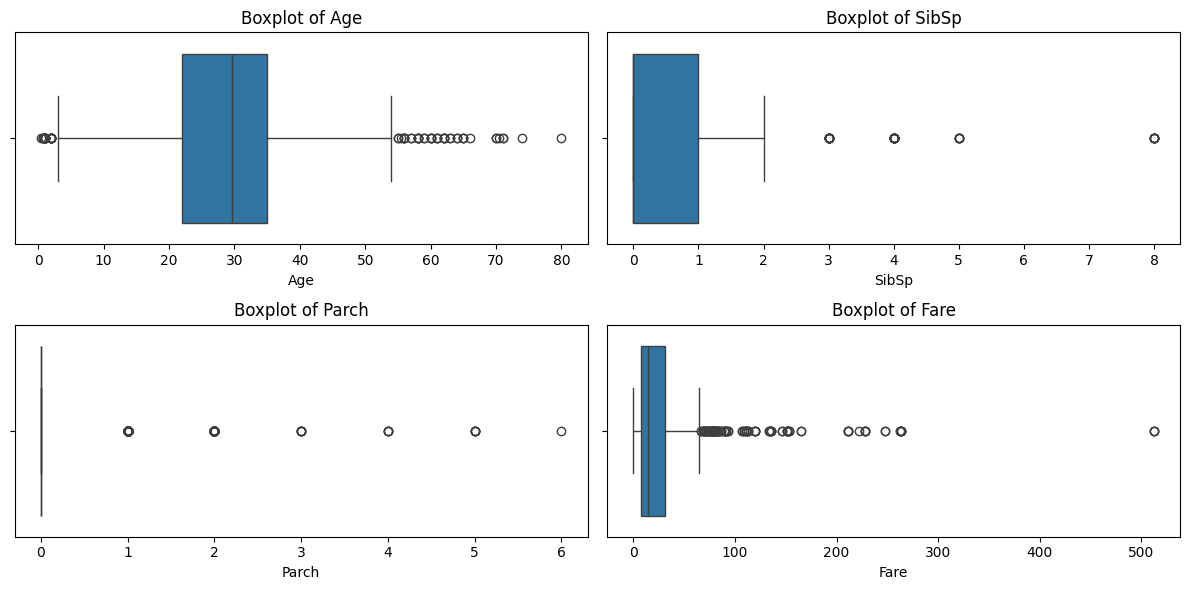

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=['Age','SibSp','Parch','Fare']  

plt.figure(figsize=(12, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i) 
    sns.boxplot(data=df_one_hot, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [123]:
Q1=df_one_hot[cols].quantile(0.25)
Q3=df_one_hot[cols].quantile(0.75)
IQR=Q3-Q1
df_no_outliers=df_one_hot[~((df_one_hot[cols]<(Q1-1.5 * IQR)) | (df_one_hot[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

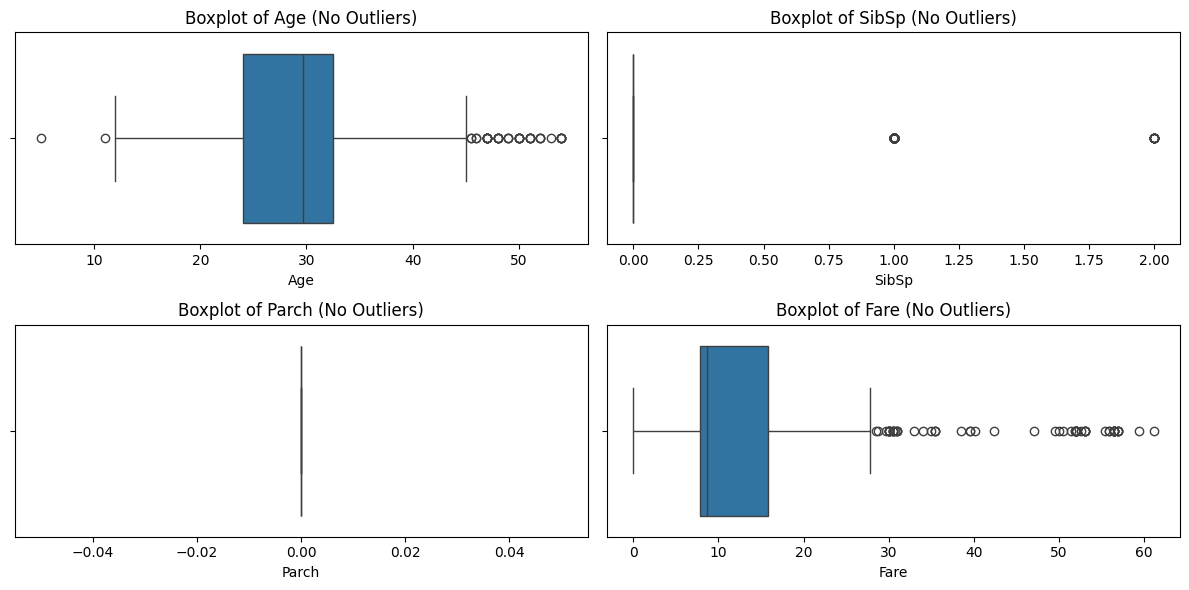

In [125]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_no_outliers, x=col)
    plt.title(f'Boxplot of {col} (No Outliers)')

plt.tight_layout()
plt.show()